# Series de tiempo y forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm

import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import datetime

plt.style.use('ggplot')

ModuleNotFoundError: No module named 'pmdarima'

## Primer paso: leer los datos

In [3]:
btc = web.get_data_yahoo(['GOOG', 'AAPL', 'TSLA'], start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2023-09-11')  )['Close']

[*********************100%%**********************]  3 of 3 completed


## Segundo paso: análisis exploratorio

<Axes: xlabel='Date'>

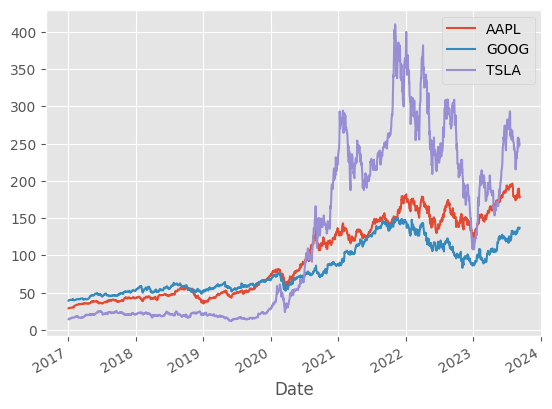

In [16]:
btc.plot()

In [20]:
# wbtc = btc.resample('W').mean()
mdf = btc.resample('W').mean()

<Axes: xlabel='Date'>

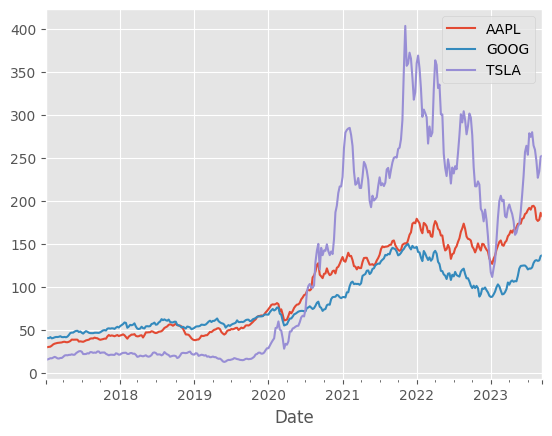

In [21]:
mdf.plot()

In [22]:
decomp = seasonal_decompose(mdf, model='additive')
decomp.plot()
# plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [23]:
model = pm.auto_arima(mbtc, seasonal=True, m=12)
model

ValueError: y should be a 1d array, got an array of shape (81, 3) instead.

In [24]:
pred = model.predict(n_periods=24, return_conf_int=True)
cint = pd.DataFrame(pred[1], index=pred[0].index)

NameError: name 'model' is not defined

In [25]:
df = pd.concat([mbtc, pred[0]], axis=1)
df.columns = ['actual', 'forecast']
df.plot()
plt.fill_between(cint.index, cint[0], cint[1], alpha=0.2)
plt.show()

NameError: name 'pred' is not defined

## Predicción

In [26]:
df = pd.read_excel('ventas.xlsx', sheet_name='Sheet2', header=3).head(81)
df

,Row Labels,AAPL,GOOG,TSLA,Grand Total
0,2017-01-01 00:00:00,29.892500,40.395238,15.954700,86.242438
1,2017-02-01 00:00:00,33.428552,40.845829,17.580737,91.855118
2,2017-03-01 00:00:00,35.154457,41.705565,17.210435,94.070457
3,2017-04-01 00:00:00,35.721710,42.202843,20.317228,98.241781
4,2017-05-01 00:00:00,38.056932,46.964205,21.101606,106.122742
...,...,...,...,...,...
76,2023-05-01 00:00:00,172.622728,116.745682,175.799090,465.167499
77,2023-06-01 00:00:00,184.283333,123.228096,246.090476,553.601905
78,2023-07-01 00:00:00,192.411501,123.553499,273.505500,589.470500
79,2023-08-01 00:00:00,181.083913,131.149131,242.333043,554.566087


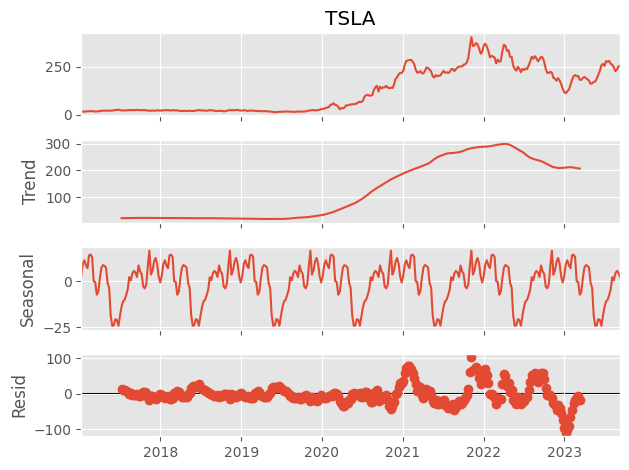

In [43]:
sku = 'TSLA'

decomp = seasonal_decompose(mdf[sku], model='additive')
decomp.plot()
plt.show()

In [32]:
fcst_acumulado = {}
cint_acumulado = {}

for sku in ['GOOG', 'AAPL', 'TSLA']:
    model = pm.auto_arima(mdf[sku], seasonal=True, m=12, cint=False)
    pred = model.predict(n_periods=24, return_conf_int=True)
    fcst = pred[0]
    cint_acumulado[sku] = pd.DataFrame(pred[1], index=pred[0].index)
    fcst_acumulado[sku] = fcst

df_fcst = pd.DataFrame(fcst_acumulado)
df_cint = pd.concat(cint_acumulado, axis=1)

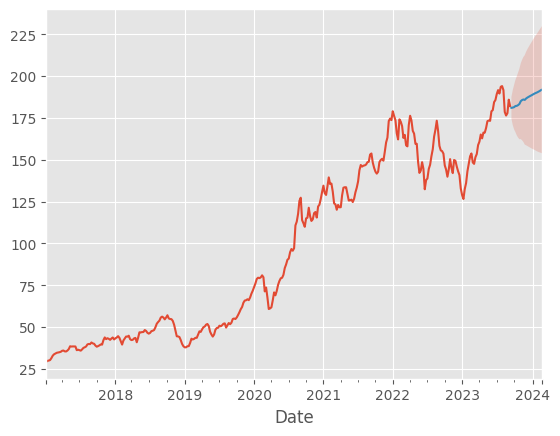

In [34]:
sku = 'AAPL'

fig, ax = plt.subplots()
mdf[sku].plot(ax=ax)
df_fcst[sku].plot(ax=ax)
plt.fill_between(df_cint[sku].index, df_cint[sku][0], df_cint[sku][1], alpha=0.2)

In [85]:
optimista = df_fcst * 1.05
normal = df_fcst.copy() 
pesimista = df_fcst * 0.95

<Axes: xlabel='Date'>

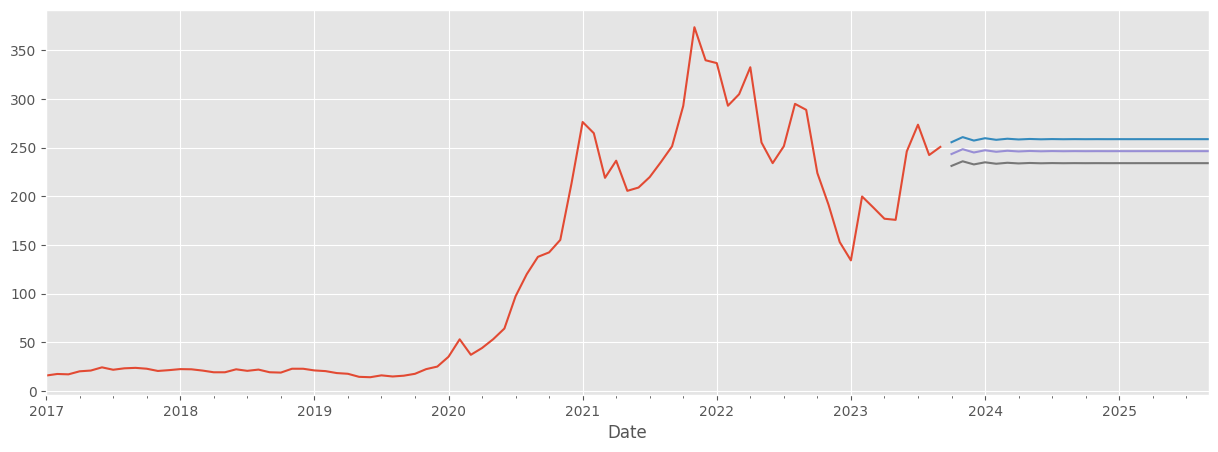

In [90]:
fig,ax = plt.subplots(figsize=(15, 5))
mdf['TSLA'].plot(ax = ax)
optimista['TSLA'].plot(ax = ax)
normal['TSLA'].plot(ax = ax)
pesimista['TSLA'].plot(ax = ax)


In [92]:
normal.to_excel('normal.xlsx')

In [ ]:






df = pd.concat([mdf['AAPL'], pred[0]], axis=1)
df.columns = ['actual', 'forecast']
df.plot()
plt.fill_between(cint.index, cint[0], cint[1], alpha=0.2)
plt.show()

# Esto es un título
## ésto un subtítulo

$E=mc^2$

Voy a empezar importando los datos que necesito

In [121]:
x = 3